In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
folder_dir = '../data/'
date_range = ["2012","2013","2014","2015","2016","2017"]

In [3]:
for i in range(len(date_range)):
    year = date_range[i]
    data_path = "MLB_" + year + "/MLB_PitchFX_" + year + "_RegularSeason.csv"
    year_data = pd.read_csv(filepath_or_buffer= folder_dir + data_path, header=0)
    
    if i == 0:
        data = year_data
    else:
        data = pd.concat([data,year_data])

data.head()

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,break_length,y,x0,on_1b,on_2b,on_3b,umpcall,outcome,offense_score,defense_score
0,2012-04-04,Marlins Park,1,top,johnsjo09,5,beltrca01,0,0,30.626,...,3.4,154.56,-1.902,NaN,NaN,NaN,X,Single,0,0
1,2012-04-04,Marlins Park,1,top,johnsjo09,6,hollima01,0,0,28.580,...,3.8,132.11,-2.052,beltrca01,NaN,NaN,S,NaN,0,0
2,2012-04-04,Marlins Park,1,top,johnsjo09,7,hollima01,0,1,31.294,...,3.7,125.20,-2.130,beltrca01,NaN,NaN,S,NaN,0,0
3,2012-04-04,Marlins Park,1,top,johnsjo09,8,hollima01,0,2,33.548,...,3.6,151.97,-2.100,beltrca01,NaN,NaN,B,NaN,0,0
4,2012-04-04,Marlins Park,1,top,johnsjo09,9,hollima01,1,2,24.925,...,7.1,144.20,-2.312,beltrca01,NaN,NaN,X,Flyout,0,0


In [4]:
'''
TODO:
    -More exploratory data analysis
    -Feature engineering/Clean data/select features
    -Define target valuable   
    
'''

'\nTODO:\n    -More exploratory data analysis\n    -Feature engineering/Clean data/select features\n    -Define target valuable   \n    \n'

In [5]:
data = data.drop(['on_1b', 'on_2b', "on_3b",'y'], axis = 1)
data.shape

(3902210, 43)

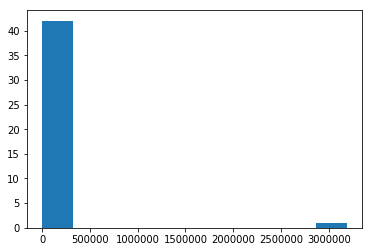

In [6]:
_ = plt.hist(data.isnull().sum())

In [7]:
print(len(data.columns.values))
print(data.columns.values[0])
data.columns.values

43
date


array(['date', 'stadium', 'inning', 'side', 'pitcher', 'pitch_count',
       'batter', 'balls', 'strikes', 'ay', 'px', 'ax', 'sz_bot', 'vz0',
       'vy0', 'pfx_x', 'type_confidence', 'z0', 'tfs', 'pz', 'start_speed',
       'az', 'zone', 'break_angle', 'spin_dir', 'end_speed', 'vx0',
       'sz_top', 'nasty', 'descr', 'pfx_z', 'break_y', 'pitch_type',
       'tfs_zulu', 'x', 'spin_rate', 'y0', 'break_length', 'x0', 'umpcall',
       'outcome', 'offense_score', 'defense_score'], dtype=object)

In [8]:
data.isnull().sum()

date                     0
stadium                  0
inning                   0
side                     0
pitcher                313
pitch_count              0
batter                   5
balls                    0
strikes                  0
ay                       0
px                       0
ax                       0
sz_bot                   0
vz0                      0
vy0                      0
pfx_x                    0
type_confidence          0
z0                       0
tfs                     29
pz                       0
start_speed              0
az                       0
zone                     0
break_angle              0
spin_dir                 0
end_speed                0
vx0                      0
sz_top                   0
nasty                  317
descr                    0
pfx_z                    0
break_y                  0
pitch_type               0
tfs_zulu                29
x                        0
spin_rate                0
y0                       0
b

In [9]:
data.dtypes

date                object
stadium             object
inning               int64
side                object
pitcher             object
pitch_count          int64
batter              object
balls                int64
strikes              int64
ay                 float64
px                 float64
ax                 float64
sz_bot             float64
vz0                float64
vy0                float64
pfx_x              float64
type_confidence    float64
z0                 float64
tfs                float64
pz                 float64
start_speed        float64
az                 float64
zone                 int64
break_angle        float64
spin_dir           float64
end_speed          float64
vx0                float64
sz_top             float64
nasty              float64
descr               object
pfx_z              float64
break_y            float64
pitch_type          object
tfs_zulu            object
x                  float64
spin_rate          float64
y0                 float64
b

### Finding feature types

In [10]:
g = data.columns.to_series().groupby(data.dtypes).groups
dtype_groups = {k.name: v for k, v in g.items()}
dtype_groups

{'float64': Index(['ay', 'px', 'ax', 'sz_bot', 'vz0', 'vy0', 'pfx_x', 'type_confidence',
        'z0', 'tfs', 'pz', 'start_speed', 'az', 'break_angle', 'spin_dir',
        'end_speed', 'vx0', 'sz_top', 'nasty', 'pfx_z', 'break_y', 'x',
        'spin_rate', 'y0', 'break_length', 'x0'],
       dtype='object'),
 'int64': Index(['inning', 'pitch_count', 'balls', 'strikes', 'zone', 'offense_score',
        'defense_score'],
       dtype='object'),
 'object': Index(['date', 'stadium', 'side', 'pitcher', 'batter', 'descr', 'pitch_type',
        'tfs_zulu', 'umpcall', 'outcome'],
       dtype='object')}

In [11]:
dtype_groups["int64"].values

array(['inning', 'pitch_count', 'balls', 'strikes', 'zone',
       'offense_score', 'defense_score'], dtype=object)

In [12]:
dtype_groups["float64"].values

array(['ay', 'px', 'ax', 'sz_bot', 'vz0', 'vy0', 'pfx_x',
       'type_confidence', 'z0', 'tfs', 'pz', 'start_speed', 'az',
       'break_angle', 'spin_dir', 'end_speed', 'vx0', 'sz_top', 'nasty',
       'pfx_z', 'break_y', 'x', 'spin_rate', 'y0', 'break_length', 'x0'], dtype=object)

In [13]:
dtype_groups["object"].values

array(['date', 'stadium', 'side', 'pitcher', 'batter', 'descr',
       'pitch_type', 'tfs_zulu', 'umpcall', 'outcome'], dtype=object)

### Analyze the index

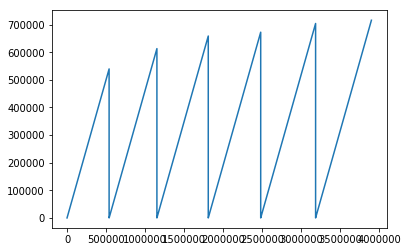

In [14]:
_ = plt.plot(data.index)

### Converting "date" feature to datetime

In [15]:
data["date"]

0         2012-04-04
1         2012-04-04
2         2012-04-04
3         2012-04-04
4         2012-04-04
5         2012-04-04
6         2012-04-04
7         2012-04-04
8         2012-04-04
9         2012-04-04
10        2012-04-04
11        2012-04-04
12        2012-04-04
13        2012-04-04
14        2012-04-04
15        2012-04-04
16        2012-04-04
17        2012-04-04
18        2012-04-04
19        2012-04-04
20        2012-04-04
21        2012-04-04
22        2012-04-04
23        2012-04-04
24        2012-04-04
25        2012-04-04
26        2012-04-04
27        2012-04-04
28        2012-04-04
29        2012-04-04
             ...    
715507    2017-10-01
715508    2017-10-01
715509    2017-10-01
715510    2017-10-01
715511    2017-10-01
715512    2017-10-01
715513    2017-10-01
715514    2017-10-01
715515    2017-10-01
715516    2017-10-01
715517    2017-10-01
715518    2017-10-01
715519    2017-10-01
715520    2017-10-01
715521    2017-10-01
715522    2017-10-01
715523    201

In [16]:
data["date"][0:5]

0    2012-04-04
1    2012-04-04
2    2012-04-04
3    2012-04-04
4    2012-04-04
Name: date, dtype: object

In [17]:
pd.to_datetime(data["date"][0:5])

0   2012-04-04
1   2012-04-04
2   2012-04-04
3   2012-04-04
4   2012-04-04
Name: date, dtype: datetime64[ns]

In [18]:
data["date"] = pd.to_datetime(data["date"])

In [19]:
data["date"][0:5]

0   2012-04-04
1   2012-04-04
2   2012-04-04
3   2012-04-04
4   2012-04-04
Name: date, dtype: datetime64[ns]

### sorting by pitcher, date and pitch_count in that order and reset index

In [20]:
data = data.sort_values(by = ["pitcher","date", "pitch_count"])
data

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,tfs_zulu,x,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score
516886,2012-09-27,Rogers Centre,8,bottom,aardsda01,1,lindad01,0,0,30.0560,...,2012-09-28 01:18:53,116.74,2317.690,50.0,3.1,-2.01600,S,NaN,5,5
516887,2012-09-27,Rogers Centre,8,bottom,aardsda01,2,lindad01,0,1,32.0220,...,2012-09-28 01:19:08,124.46,2354.990,50.0,3.8,-2.06800,S,NaN,5,5
516888,2012-09-27,Rogers Centre,8,bottom,aardsda01,3,lindad01,0,2,28.0490,...,2012-09-28 01:19:26,121.03,1636.480,50.0,6.3,-1.96900,S,NaN,5,5
516889,2012-09-27,Rogers Centre,8,bottom,aardsda01,4,lindad01,0,2,30.4990,...,2012-09-28 01:19:51,184.55,2380.220,50.0,3.8,-2.44100,B,NaN,5,5
516890,2012-09-27,Rogers Centre,8,bottom,aardsda01,5,lindad01,1,2,25.1680,...,2012-09-28 01:20:07,132.19,1034.360,50.0,7.0,-2.35200,S,NaN,5,5
516891,2012-09-27,Rogers Centre,8,bottom,aardsda01,6,lindad01,1,2,30.3840,...,2012-09-28 01:20:32,140.77,2491.110,50.0,4.2,-1.98200,X,Groundout,5,5
516892,2012-09-27,Rogers Centre,8,bottom,aardsda01,7,arencjp01,0,0,30.1620,...,2012-09-28 01:21:06,138.20,2269.490,50.0,3.4,-2.10000,X,Home Run,5,5
516893,2012-09-27,Rogers Centre,8,bottom,aardsda01,8,johnske05,0,0,24.8640,...,2012-09-28 01:21:51,99.57,2030.960,50.0,7.2,-1.86600,S,NaN,6,6
516894,2012-09-27,Rogers Centre,8,bottom,aardsda01,9,johnske05,0,1,24.2140,...,2012-09-28 01:22:02,151.93,1380.710,50.0,7.1,-2.22200,B,NaN,6,6
516895,2012-09-27,Rogers Centre,8,bottom,aardsda01,10,johnske05,1,1,29.4320,...,2012-09-28 01:22:15,151.07,2230.470,50.0,3.2,-2.05100,B,NaN,6,6


In [21]:
data = data.reset_index(drop = True)
data

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,tfs_zulu,x,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score
0,2012-09-27,Rogers Centre,8,bottom,aardsda01,1,lindad01,0,0,30.0560,...,2012-09-28 01:18:53,116.74,2317.690,50.0,3.1,-2.01600,S,NaN,5,5
1,2012-09-27,Rogers Centre,8,bottom,aardsda01,2,lindad01,0,1,32.0220,...,2012-09-28 01:19:08,124.46,2354.990,50.0,3.8,-2.06800,S,NaN,5,5
2,2012-09-27,Rogers Centre,8,bottom,aardsda01,3,lindad01,0,2,28.0490,...,2012-09-28 01:19:26,121.03,1636.480,50.0,6.3,-1.96900,S,NaN,5,5
3,2012-09-27,Rogers Centre,8,bottom,aardsda01,4,lindad01,0,2,30.4990,...,2012-09-28 01:19:51,184.55,2380.220,50.0,3.8,-2.44100,B,NaN,5,5
4,2012-09-27,Rogers Centre,8,bottom,aardsda01,5,lindad01,1,2,25.1680,...,2012-09-28 01:20:07,132.19,1034.360,50.0,7.0,-2.35200,S,NaN,5,5
5,2012-09-27,Rogers Centre,8,bottom,aardsda01,6,lindad01,1,2,30.3840,...,2012-09-28 01:20:32,140.77,2491.110,50.0,4.2,-1.98200,X,Groundout,5,5
6,2012-09-27,Rogers Centre,8,bottom,aardsda01,7,arencjp01,0,0,30.1620,...,2012-09-28 01:21:06,138.20,2269.490,50.0,3.4,-2.10000,X,Home Run,5,5
7,2012-09-27,Rogers Centre,8,bottom,aardsda01,8,johnske05,0,0,24.8640,...,2012-09-28 01:21:51,99.57,2030.960,50.0,7.2,-1.86600,S,NaN,6,6
8,2012-09-27,Rogers Centre,8,bottom,aardsda01,9,johnske05,0,1,24.2140,...,2012-09-28 01:22:02,151.93,1380.710,50.0,7.1,-2.22200,B,NaN,6,6
9,2012-09-27,Rogers Centre,8,bottom,aardsda01,10,johnske05,1,1,29.4320,...,2012-09-28 01:22:15,151.07,2230.470,50.0,3.2,-2.05100,B,NaN,6,6


### Plotting features

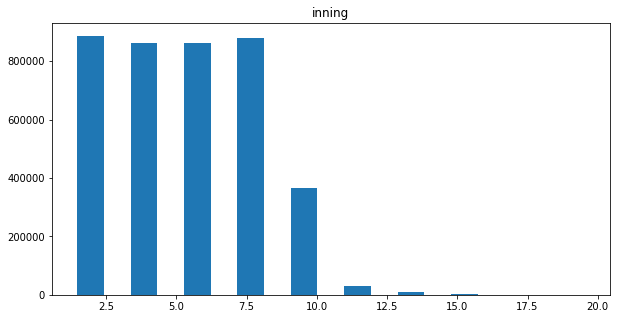

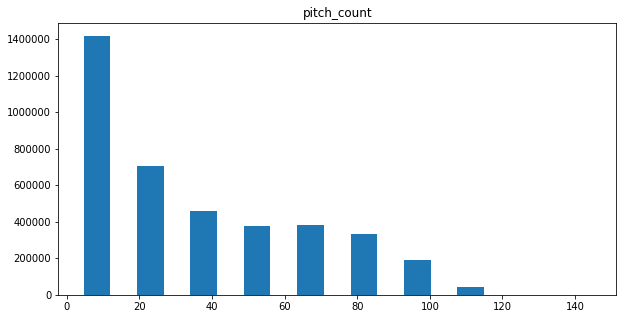

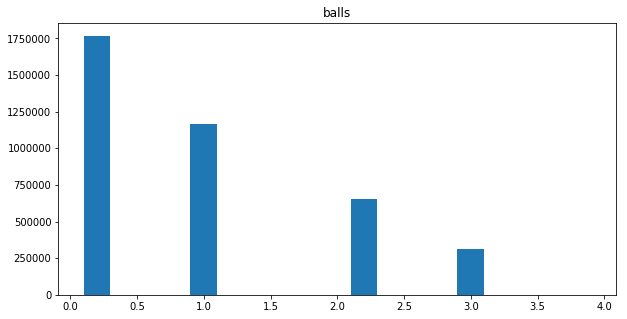

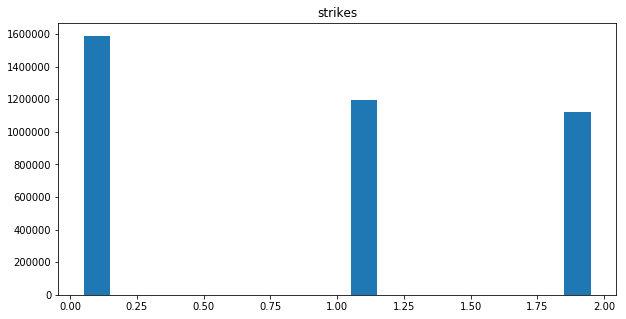

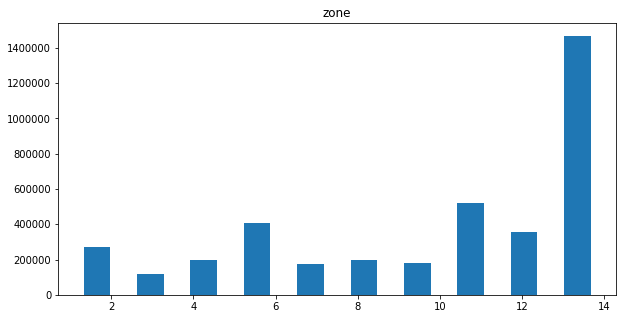

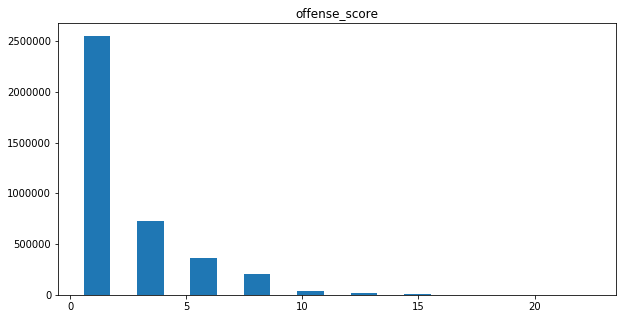

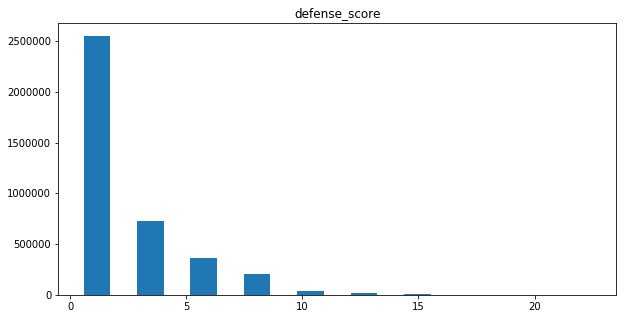

In [22]:
#Plotting all Int64 typed features
for i in range(len(dtype_groups["int64"].values)):
    plt.figure(i, 
               figsize=(10,5))
    plt.title(dtype_groups["int64"].values[i])
    plt.hist(data[dtype_groups["int64"].values[i]],
             rwidth = 0.5)

C:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


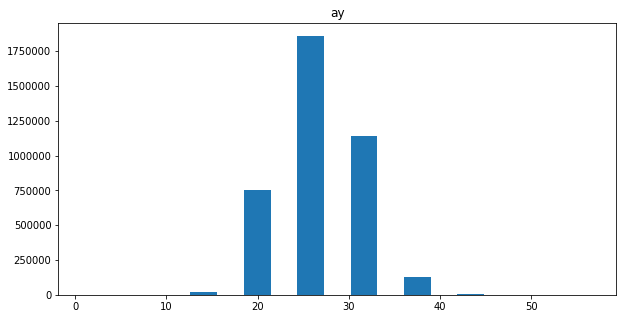

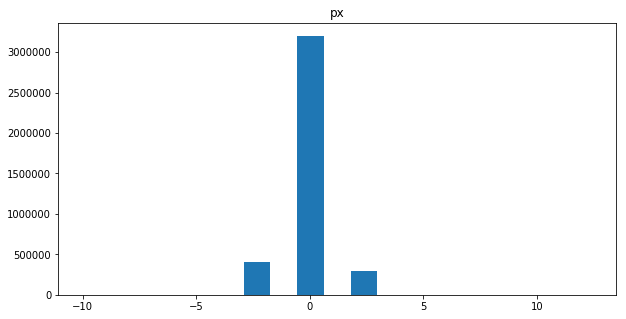

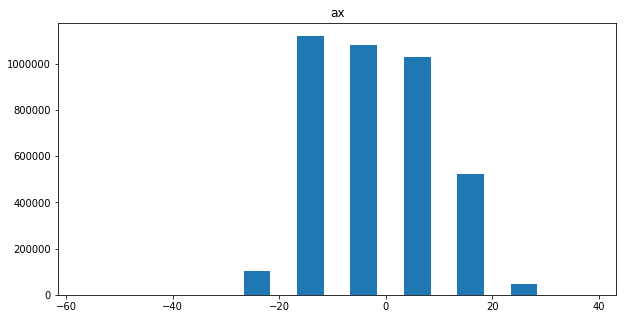

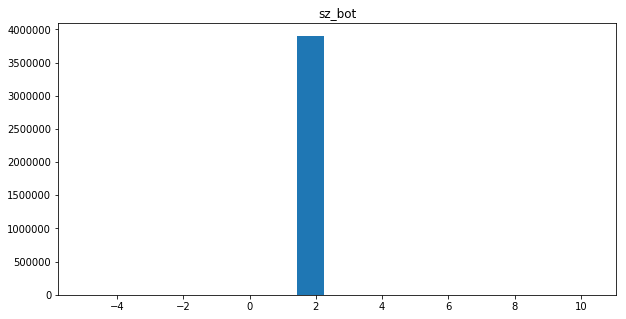

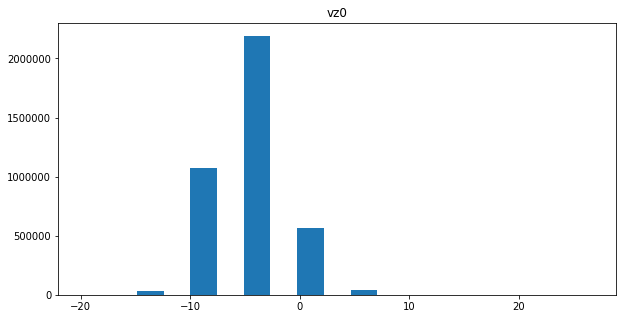

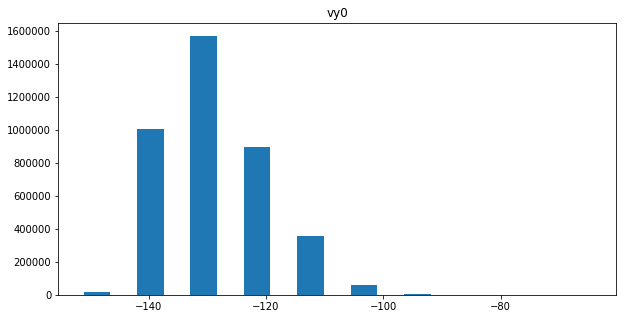

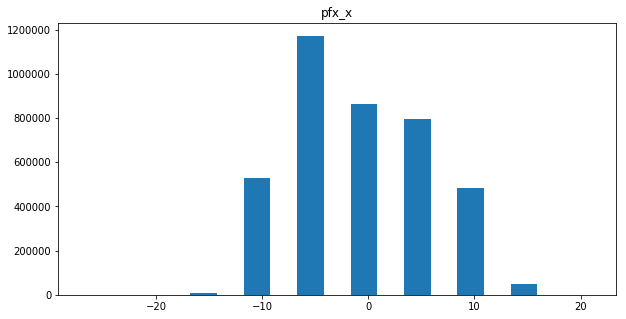

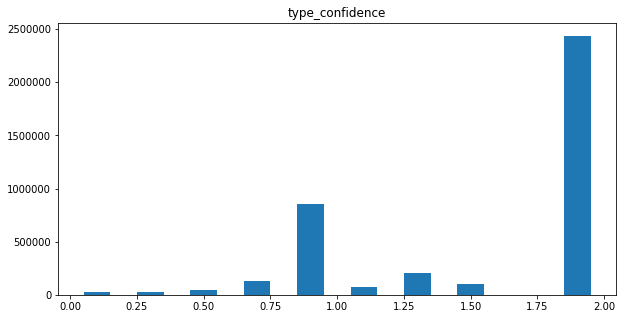

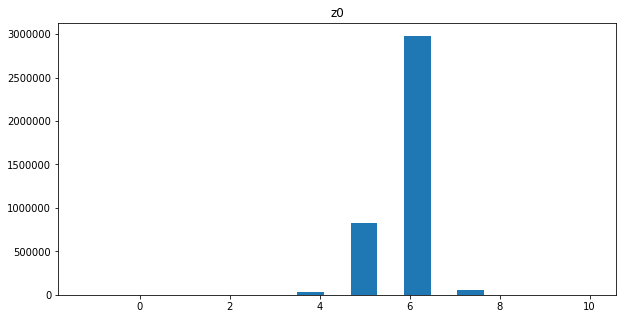

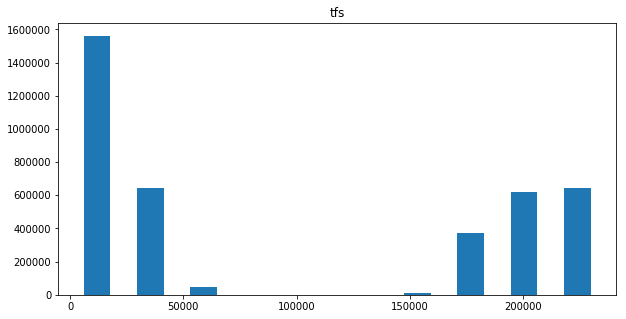

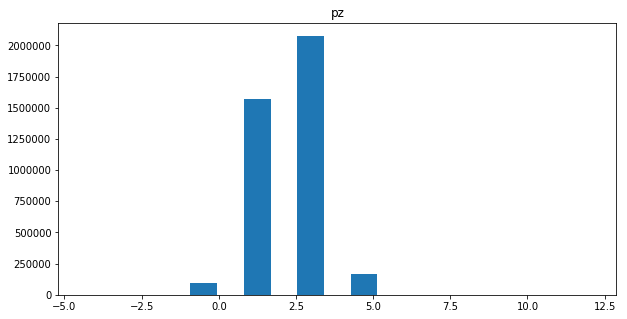

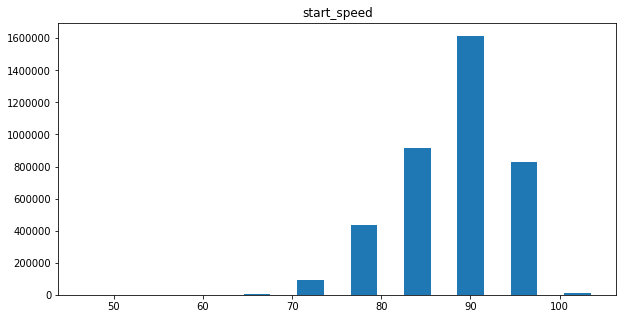

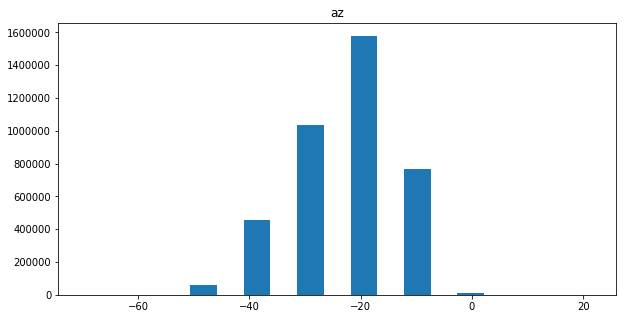

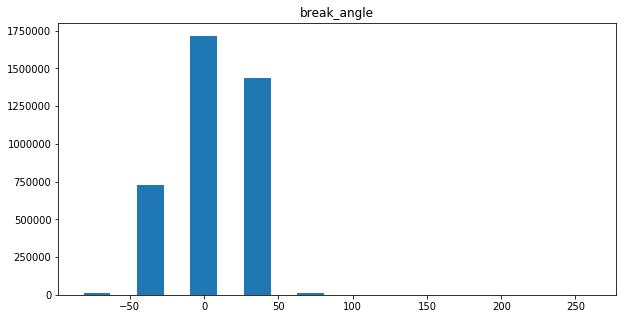

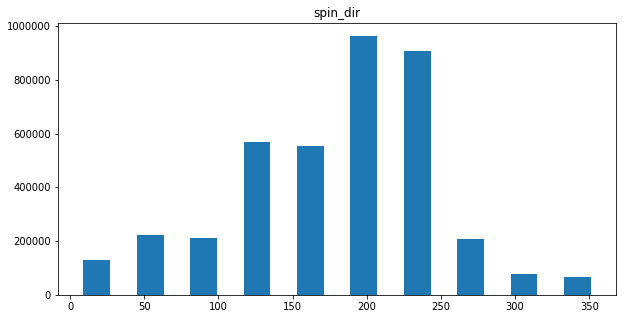

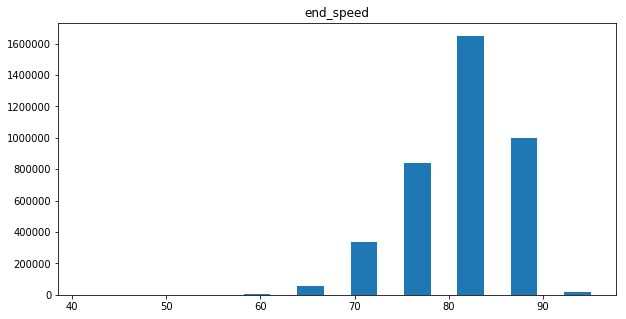

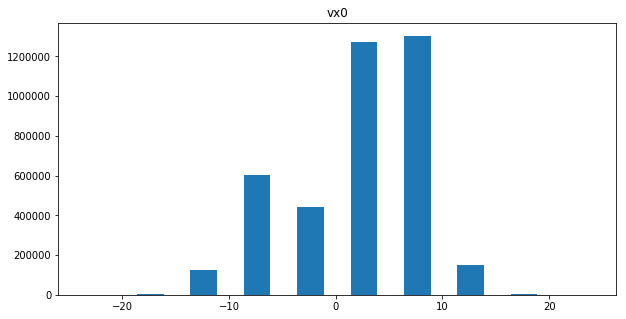

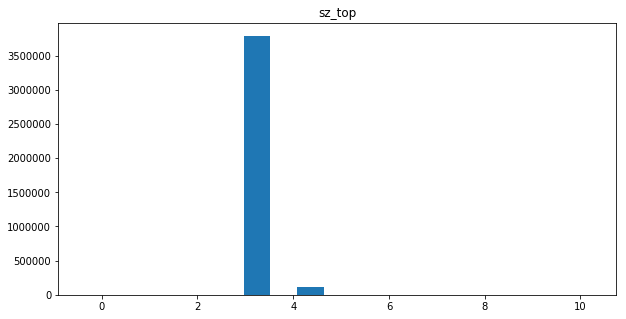

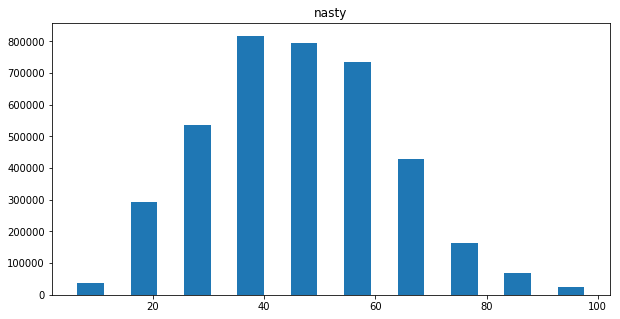

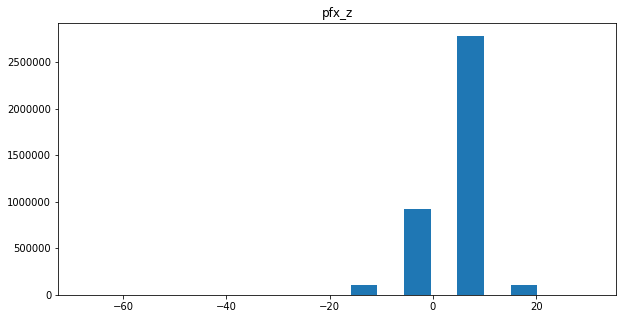

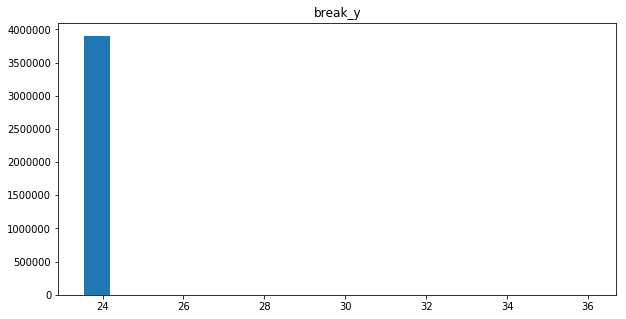

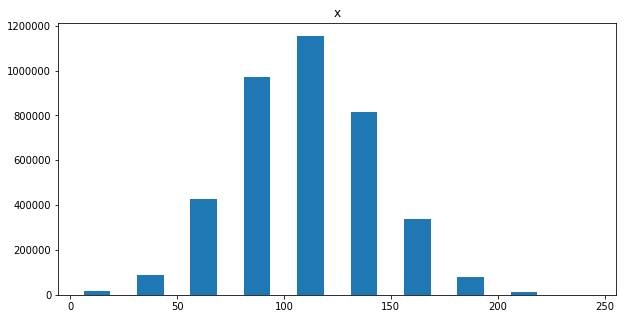

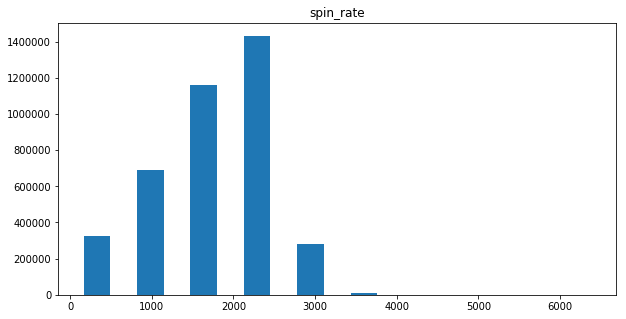

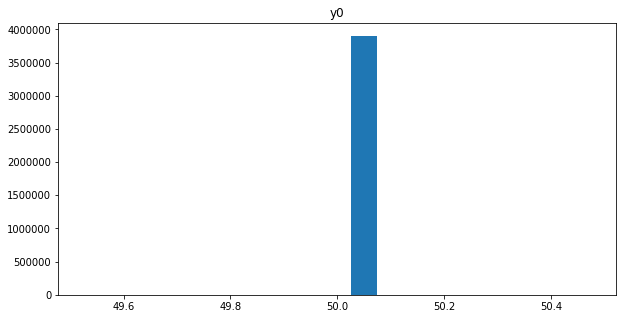

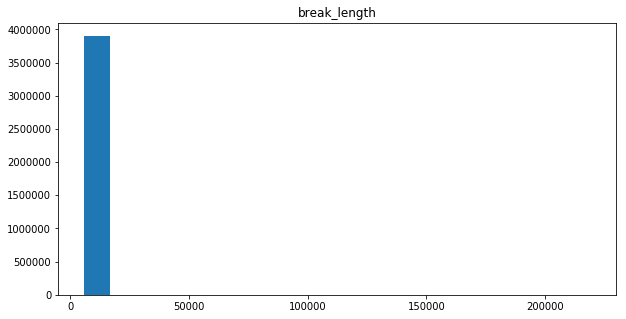

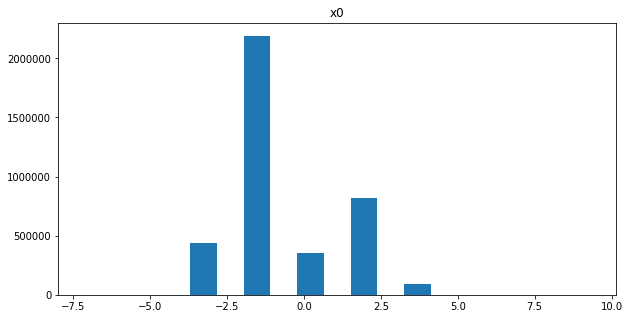

In [23]:
#Plotting all Float64 typed features
for i in range(len(dtype_groups["float64"].values)):
    plt.figure(i, 
               figsize=(10,5))
    plt.title(dtype_groups["float64"].values[i])
    plt.hist(data[dtype_groups["float64"].values[i]].dropna(),
             rwidth = 0.5)

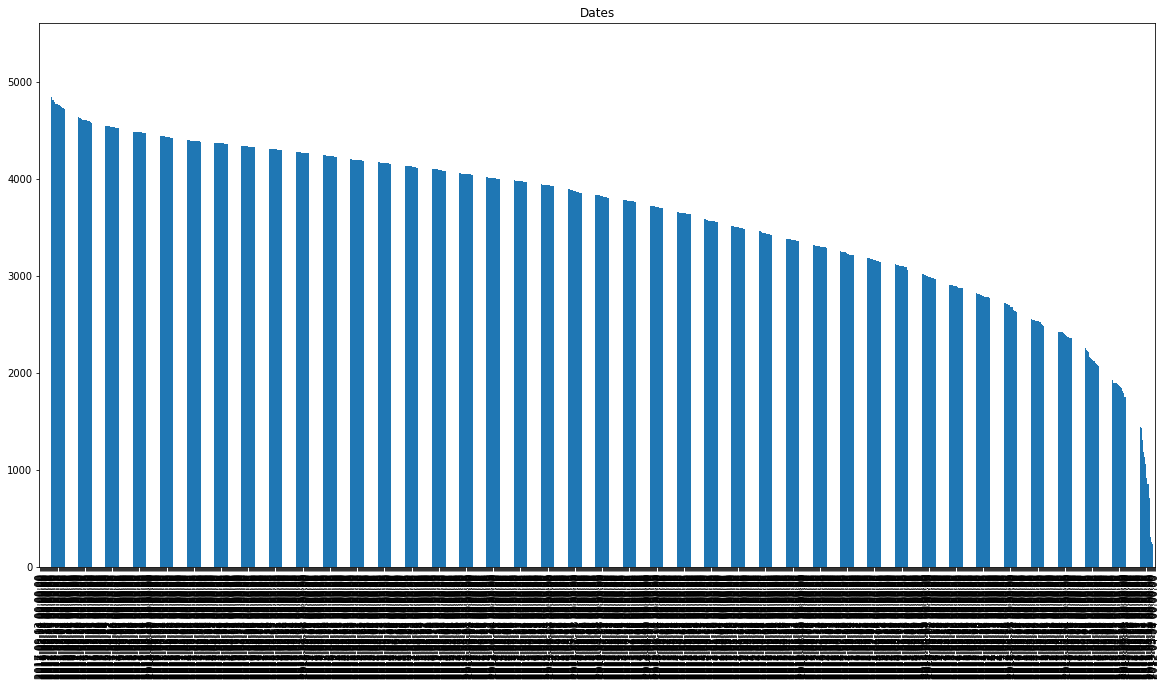

In [ ]:
_ = data[dtype_groups["object"][0]].value_counts().plot(kind="bar",
                                                    figsize=(20,10),
                                                    title = "Dates")

In [ ]:
#Plotting all Object typed features
for i in range(len(dtype_groups["object"].values)):
    print(dtype_groups["object"][i])
    _ = data[dtype_groups["object"][i]].value_counts().plot(kind="bar",
                                                       figsize=(20,10),
                                                       title = dtype_groups["object"][i])

date
stadium
side
pitcher
batter
descr
pitch_type
tfs_zulu


(array([  273908.,   117352.,   197796.,   409078.,   174966.,   199062.,
          181744.,   522515.,   357548.,  1468241.]),
 array([  1. ,   2.3,   3.6,   4.9,   6.2,   7.5,   8.8,  10.1,  11.4,
         12.7,  14. ]),
 <a list of 10 Patch objects>)

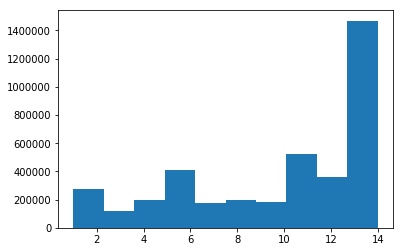

In [14]:
plt.hist(data['zone'])

(array([ 127781.,  222706.,  209657.,  570044.,  554273.,  963124.,
         906232.,  206608.,   76506.,   65279.]),
 array([ -2.00000000e-03,   3.59983000e+01,   7.19986000e+01,
          1.07998900e+02,   1.43999200e+02,   1.79999500e+02,
          2.15999800e+02,   2.52000100e+02,   2.88000400e+02,
          3.24000700e+02,   3.60001000e+02]),
 <a list of 10 Patch objects>)

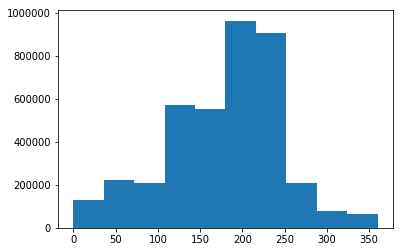

In [15]:
plt.hist(data['spin_dir'])

# Rolling_mean feature

In [22]:
#data = data.sample(n = 1000)
data.shape

(3902210, 43)

In [23]:
data.loc[data['pitch_type'] == "FF"]["start_speed"][0:5]

0    91.4
1    92.0
3    92.3
5    91.8
6    91.9
Name: start_speed, dtype: float64

In [24]:
roll_means = data.loc[data['pitch_type'] == "FF"].groupby('pitcher')['start_speed'].rolling(5).mean()
roll_means

pitcher           
aardsda01  0            NaN
           1            NaN
           3            NaN
           5            NaN
           6          91.88
           9          91.82
           10         91.68
           11         91.34
           15         91.22
           16         91.10
           19         91.10
           20         91.18
           23         91.52
           24         91.36
           26         91.36
           28         91.50
           29         91.58
           30         91.62
           31         92.02
           32         92.26
           34         92.46
           37         92.20
           41         91.98
           42         92.04
           43         92.04
           46         91.82
           49         92.02
           52         91.90
           55         92.02
           56         91.72
                      ...  
zychto01   3901841    93.86
           3901842    93.76
           3901846    93.50
           3901848    93.48
 

check where the NaNs are to see if rolling averages use data from previous pitchers

In [25]:
roll_means.values

array([   nan,    nan,    nan, ...,  92.18,  92.48,  92.04])

In [26]:
nan_roll_means = pd.DataFrame(np.argwhere(np.isnan(roll_means.values)))
nan_roll_means

,0
0,0
1,1
2,2
3,3
4,764
5,765
6,766
7,767
8,2051
9,2052


It seems like rolling mean is not using values from previous pitchers.

Take only the numeric index and discard the pitcher index:

In [27]:
roll_means = pd.DataFrame(roll_means)
roll_means

start_speed
pitcher                       
aardsda01 0                NaN
          1                NaN
          3                NaN
          5                NaN
          6              91.88
          9              91.82
          10             91.68
          11             91.34
          15             91.22
          16             91.10
          19             91.10
          20             91.18
          23             91.52
          24             91.36
          26             91.36
          28             91.50
          29             91.58
          30             91.62
          31             92.02
          32             92.26
          34             92.46
          37             92.20
          41             91.98
          42             92.04
          43             92.04
          46             91.82
          49             92.02
          52             91.90
          55             92.02
          56             91.72
...                        ...
zychto01  3901841        93.86
          3901842        93.76
          3901846        93.50
          3901848        93.48
          3901849        93.80
          3901850        93.62
          3901852        93.64
          3901853        93.94
          3901855        93.74
          3901856        93.58
          3901857        93.64
          3901858        93.60
          3901859        93.44
          3901860        93.60
          3901862        93.64
          3901863        93.72
          3901866        93.12
          3901867        93.02
          3901870        92.60
          3901871        92.58
          3901874        92.38
          3901875        92.56
          3901876        92.08
          3901877        91.86
          3901879        92.10
          3901880        91.94
          3901881        91.76
          3901884        92.18
          3901886        92.48
          3901890        92.04

[1334993 rows x 1 columns]

In [28]:
roll_means.index.values

array([('aardsda01', 0), ('aardsda01', 1), ('aardsda01', 3), ...,
       ('zychto01', 3901884), ('zychto01', 3901886), ('zychto01', 3901890)], dtype=object)

In [29]:
roll_means = roll_means.reset_index()
roll_means.head()

,pitcher,level_1,start_speed
0,aardsda01,0,NaN
1,aardsda01,1,NaN
2,aardsda01,3,NaN
3,aardsda01,5,NaN
4,aardsda01,6,91.88


In [30]:
roll_means = roll_means.drop("pitcher", axis = 1)
roll_means.head()

,level_1,start_speed
0,0,NaN
1,1,NaN
2,3,NaN
3,5,NaN
4,6,91.88


In [31]:
roll_means.columns.values[1] = "rolling_start_speed"

In [32]:
roll_means

,level_1,rolling_start_speed
0,0,NaN
1,1,NaN
2,3,NaN
3,5,NaN
4,6,91.88
5,9,91.82
6,10,91.68
7,11,91.34
8,15,91.22
9,16,91.10


In [33]:
roll_means = roll_means.set_index("level_1")
roll_means.head()

,rolling_start_speed
level_1,
0,NaN
1,NaN
3,NaN
5,NaN
6,91.88


In [34]:
data = pd.concat([data,roll_means], axis = 1)
data

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,x,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score,rolling_start_speed
0,2012-09-27,Rogers Centre,8,bottom,aardsda01,1,lindad01,0,0,30.0560,...,116.74,2317.690,50.0,3.1,-2.01600,S,NaN,5,5,NaN
1,2012-09-27,Rogers Centre,8,bottom,aardsda01,2,lindad01,0,1,32.0220,...,124.46,2354.990,50.0,3.8,-2.06800,S,NaN,5,5,NaN
2,2012-09-27,Rogers Centre,8,bottom,aardsda01,3,lindad01,0,2,28.0490,...,121.03,1636.480,50.0,6.3,-1.96900,S,NaN,5,5,NaN
3,2012-09-27,Rogers Centre,8,bottom,aardsda01,4,lindad01,0,2,30.4990,...,184.55,2380.220,50.0,3.8,-2.44100,B,NaN,5,5,NaN
4,2012-09-27,Rogers Centre,8,bottom,aardsda01,5,lindad01,1,2,25.1680,...,132.19,1034.360,50.0,7.0,-2.35200,S,NaN,5,5,NaN
5,2012-09-27,Rogers Centre,8,bottom,aardsda01,6,lindad01,1,2,30.3840,...,140.77,2491.110,50.0,4.2,-1.98200,X,Groundout,5,5,NaN
6,2012-09-27,Rogers Centre,8,bottom,aardsda01,7,arencjp01,0,0,30.1620,...,138.20,2269.490,50.0,3.4,-2.10000,X,Home Run,5,5,91.88
7,2012-09-27,Rogers Centre,8,bottom,aardsda01,8,johnske05,0,0,24.8640,...,99.57,2030.960,50.0,7.2,-1.86600,S,NaN,6,6,NaN
8,2012-09-27,Rogers Centre,8,bottom,aardsda01,9,johnske05,0,1,24.2140,...,151.93,1380.710,50.0,7.1,-2.22200,B,NaN,6,6,NaN
9,2012-09-27,Rogers Centre,8,bottom,aardsda01,10,johnske05,1,1,29.4320,...,151.07,2230.470,50.0,3.2,-2.05100,B,NaN,6,6,91.82


Ok, now we have the rolling means in the data dataframe but there are NaNs in the beginning of rolling means for each pitcher and between fastballs. So pad NaNs with the last value and change each beginning sequence for each pitcher back to NaN (because they will be padded with the previous pitcher's end rolling mean)

Padding the NaNs to the futureeee!

In [35]:
padded_roll_means = data["rolling_start_speed"].fillna(method = "ffill")
padded_roll_means

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6          91.88
7          91.88
8          91.88
9          91.82
10         91.68
11         91.34
12         91.34
13         91.34
14         91.34
15         91.22
16         91.10
17         91.10
18         91.10
19         91.10
20         91.18
21         91.18
22         91.18
23         91.52
24         91.36
25         91.36
26         91.36
27         91.36
28         91.50
29         91.58
           ...  
3902180    92.04
3902181    92.04
3902182    92.04
3902183    92.04
3902184    92.04
3902185    92.04
3902186    92.04
3902187    92.04
3902188    92.04
3902189    92.04
3902190    92.04
3902191    92.04
3902192    92.04
3902193    92.04
3902194    92.04
3902195    92.04
3902196    92.04
3902197    92.04
3902198    92.04
3902199    92.04
3902200    92.04
3902201    92.04
3902202    92.04
3902203    92.04
3902204    92.04
3902205    92.04
3902206    92.04
3902207    92.

In [36]:
nan_roll_means.values.reshape(1,-1)[0]

array([      0,       1,       2, ..., 1334677, 1334678, 1334679], dtype=int64)

In [37]:
len(nan_roll_means.values)

5215

In [38]:
padded_roll_means[nan_roll_means.values.reshape(1,-1)[0]]

0            NaN
1            NaN
2            NaN
3            NaN
764        91.78
765        91.88
766        91.64
767        91.64
2051       94.84
2052       94.84
2053       94.84
2054       94.78
2887       92.18
2888       92.18
2889       92.18
2890       92.18
3268       93.06
3269       93.06
3270       93.06
3271       93.06
3529       86.84
3530       86.84
3531       86.84
3532       86.84
4168       90.08
4169       90.08
4170       90.08
4171       90.08
4221       89.74
4222       89.74
           ...  
1324832    90.78
1324833    90.68
1324925    90.06
1324926    90.06
1324927    90.06
1324928    90.06
1325290    90.32
1325291    90.32
1325292    90.56
1325293    90.50
1325608    86.36
1325609    86.36
1325610    86.36
1325611    86.36
1325866    90.48
1325867    90.48
1325868    90.00
1325869    90.00
1326240    96.86
1326241    97.38
1326242    97.38
1326243    97.38
1326247    97.64
1326248    97.64
1326249    97.64
1326250    97.64
1334676    91.10
1334677    91.

In [39]:
padded_roll_means[nan_roll_means.values.reshape(1,-1)[0]] = np.nan
padded_roll_means[nan_roll_means.values.reshape(1,-1)[0]]

0         NaN
1         NaN
2         NaN
3         NaN
764       NaN
765       NaN
766       NaN
767       NaN
2051      NaN
2052      NaN
2053      NaN
2054      NaN
2887      NaN
2888      NaN
2889      NaN
2890      NaN
3268      NaN
3269      NaN
3270      NaN
3271      NaN
3529      NaN
3530      NaN
3531      NaN
3532      NaN
4168      NaN
4169      NaN
4170      NaN
4171      NaN
4221      NaN
4222      NaN
           ..
1324832   NaN
1324833   NaN
1324925   NaN
1324926   NaN
1324927   NaN
1324928   NaN
1325290   NaN
1325291   NaN
1325292   NaN
1325293   NaN
1325608   NaN
1325609   NaN
1325610   NaN
1325611   NaN
1325866   NaN
1325867   NaN
1325868   NaN
1325869   NaN
1326240   NaN
1326241   NaN
1326242   NaN
1326243   NaN
1326247   NaN
1326248   NaN
1326249   NaN
1326250   NaN
1334676   NaN
1334677   NaN
1334678   NaN
1334679   NaN
Name: rolling_start_speed, Length: 5215, dtype: float64

So changed the starting sequence of fastballs back to NaN

Replacing rolling means with the padded ones:

In [40]:
data["rolling_start_speed"] = padded_roll_means
data

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,x,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score,rolling_start_speed
0,2012-09-27,Rogers Centre,8,bottom,aardsda01,1,lindad01,0,0,30.0560,...,116.74,2317.690,50.0,3.1,-2.01600,S,NaN,5,5,NaN
1,2012-09-27,Rogers Centre,8,bottom,aardsda01,2,lindad01,0,1,32.0220,...,124.46,2354.990,50.0,3.8,-2.06800,S,NaN,5,5,NaN
2,2012-09-27,Rogers Centre,8,bottom,aardsda01,3,lindad01,0,2,28.0490,...,121.03,1636.480,50.0,6.3,-1.96900,S,NaN,5,5,NaN
3,2012-09-27,Rogers Centre,8,bottom,aardsda01,4,lindad01,0,2,30.4990,...,184.55,2380.220,50.0,3.8,-2.44100,B,NaN,5,5,NaN
4,2012-09-27,Rogers Centre,8,bottom,aardsda01,5,lindad01,1,2,25.1680,...,132.19,1034.360,50.0,7.0,-2.35200,S,NaN,5,5,NaN
5,2012-09-27,Rogers Centre,8,bottom,aardsda01,6,lindad01,1,2,30.3840,...,140.77,2491.110,50.0,4.2,-1.98200,X,Groundout,5,5,NaN
6,2012-09-27,Rogers Centre,8,bottom,aardsda01,7,arencjp01,0,0,30.1620,...,138.20,2269.490,50.0,3.4,-2.10000,X,Home Run,5,5,91.88
7,2012-09-27,Rogers Centre,8,bottom,aardsda01,8,johnske05,0,0,24.8640,...,99.57,2030.960,50.0,7.2,-1.86600,S,NaN,6,6,91.88
8,2012-09-27,Rogers Centre,8,bottom,aardsda01,9,johnske05,0,1,24.2140,...,151.93,1380.710,50.0,7.1,-2.22200,B,NaN,6,6,91.88
9,2012-09-27,Rogers Centre,8,bottom,aardsda01,10,johnske05,1,1,29.4320,...,151.07,2230.470,50.0,3.2,-2.05100,B,NaN,6,6,91.82


### Deleting rows with no pitchers

In [41]:
data["pitcher"].values

array(['aardsda01', 'aardsda01', 'aardsda01', ..., nan, nan, nan], dtype=object)

In [42]:
data["pitcher"].values[-1]

nan

In [43]:
type(data["pitcher"].values[-1])

float

In [44]:
import math

In [45]:
math.isnan(data["pitcher"].values[-1])

True

In [46]:
data["pitcher"] = data["pitcher"].astype("str")
data["pitcher"]

0          aardsda01
1          aardsda01
2          aardsda01
3          aardsda01
4          aardsda01
5          aardsda01
6          aardsda01
7          aardsda01
8          aardsda01
9          aardsda01
10         aardsda01
11         aardsda01
12         aardsda01
13         aardsda01
14         aardsda01
15         aardsda01
16         aardsda01
17         aardsda01
18         aardsda01
19         aardsda01
20         aardsda01
21         aardsda01
22         aardsda01
23         aardsda01
24         aardsda01
25         aardsda01
26         aardsda01
27         aardsda01
28         aardsda01
29         aardsda01
             ...    
3902180          nan
3902181          nan
3902182          nan
3902183          nan
3902184          nan
3902185          nan
3902186          nan
3902187          nan
3902188          nan
3902189          nan
3902190          nan
3902191          nan
3902192          nan
3902193          nan
3902194          nan
3902195          nan
3902196      

In [47]:
nan_pitchers = pd.DataFrame(np.argwhere(data["pitcher"] == "nan")).values
nan_pitchers = nan_pitchers.reshape(1,-1)[0]
nan_pitchers

array([3901897, 3901898, 3901899, 3901900, 3901901, 3901902, 3901903,
       3901904, 3901905, 3901906, 3901907, 3901908, 3901909, 3901910,
       3901911, 3901912, 3901913, 3901914, 3901915, 3901916, 3901917,
       3901918, 3901919, 3901920, 3901921, 3901922, 3901923, 3901924,
       3901925, 3901926, 3901927, 3901928, 3901929, 3901930, 3901931,
       3901932, 3901933, 3901934, 3901935, 3901936, 3901937, 3901938,
       3901939, 3901940, 3901941, 3901942, 3901943, 3901944, 3901945,
       3901946, 3901947, 3901948, 3901949, 3901950, 3901951, 3901952,
       3901953, 3901954, 3901955, 3901956, 3901957, 3901958, 3901959,
       3901960, 3901961, 3901962, 3901963, 3901964, 3901965, 3901966,
       3901967, 3901968, 3901969, 3901970, 3901971, 3901972, 3901973,
       3901974, 3901975, 3901976, 3901977, 3901978, 3901979, 3901980,
       3901981, 3901982, 3901983, 3901984, 3901985, 3901986, 3901987,
       3901988, 3901989, 3901990, 3901991, 3901992, 3901993, 3901994,
       3901995, 3901

In [48]:
data = data.drop(nan_pitchers)
data

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,x,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score,rolling_start_speed
0,2012-09-27,Rogers Centre,8,bottom,aardsda01,1,lindad01,0,0,30.0560,...,116.74,2317.690,50.0,3.1,-2.01600,S,NaN,5,5,NaN
1,2012-09-27,Rogers Centre,8,bottom,aardsda01,2,lindad01,0,1,32.0220,...,124.46,2354.990,50.0,3.8,-2.06800,S,NaN,5,5,NaN
2,2012-09-27,Rogers Centre,8,bottom,aardsda01,3,lindad01,0,2,28.0490,...,121.03,1636.480,50.0,6.3,-1.96900,S,NaN,5,5,NaN
3,2012-09-27,Rogers Centre,8,bottom,aardsda01,4,lindad01,0,2,30.4990,...,184.55,2380.220,50.0,3.8,-2.44100,B,NaN,5,5,NaN
4,2012-09-27,Rogers Centre,8,bottom,aardsda01,5,lindad01,1,2,25.1680,...,132.19,1034.360,50.0,7.0,-2.35200,S,NaN,5,5,NaN
5,2012-09-27,Rogers Centre,8,bottom,aardsda01,6,lindad01,1,2,30.3840,...,140.77,2491.110,50.0,4.2,-1.98200,X,Groundout,5,5,NaN
6,2012-09-27,Rogers Centre,8,bottom,aardsda01,7,arencjp01,0,0,30.1620,...,138.20,2269.490,50.0,3.4,-2.10000,X,Home Run,5,5,91.88
7,2012-09-27,Rogers Centre,8,bottom,aardsda01,8,johnske05,0,0,24.8640,...,99.57,2030.960,50.0,7.2,-1.86600,S,NaN,6,6,91.88
8,2012-09-27,Rogers Centre,8,bottom,aardsda01,9,johnske05,0,1,24.2140,...,151.93,1380.710,50.0,7.1,-2.22200,B,NaN,6,6,91.88
9,2012-09-27,Rogers Centre,8,bottom,aardsda01,10,johnske05,1,1,29.4320,...,151.07,2230.470,50.0,3.2,-2.05100,B,NaN,6,6,91.82


### Adding 20 pitch rolling mean

In [49]:
data.shape

(3901897, 44)

In [50]:
long_roll_means = data.loc[data['pitch_type'] == "FF"]\
                    .groupby('pitcher')['start_speed']\
                    .rolling(20).mean()

nan_longroll_means = pd.DataFrame(np.argwhere(np.isnan(long_roll_means.values)))

long_roll_means = pd.DataFrame(long_roll_means)
long_roll_means = long_roll_means.reset_index()
long_roll_means = long_roll_means.drop("pitcher", axis = 1)
long_roll_means.columns.values[1] = "long_rolling_start_speed"
long_roll_means = long_roll_means.set_index("level_1")



data = pd.concat([data,long_roll_means], axis = 1)
padded_long_roll_means = data["long_rolling_start_speed"].fillna(method = "ffill")
padded_long_roll_means[nan_longroll_means.values.reshape(1,-1)[0]] = np.nan
data["long_rolling_start_speed"] = padded_long_roll_means
data

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score,rolling_start_speed,long_rolling_start_speed
0,2012-09-27,Rogers Centre,8,bottom,aardsda01,1,lindad01,0,0,30.0560,...,2317.690,50.0,3.1,-2.01600,S,NaN,5,5,NaN,NaN
1,2012-09-27,Rogers Centre,8,bottom,aardsda01,2,lindad01,0,1,32.0220,...,2354.990,50.0,3.8,-2.06800,S,NaN,5,5,NaN,NaN
2,2012-09-27,Rogers Centre,8,bottom,aardsda01,3,lindad01,0,2,28.0490,...,1636.480,50.0,6.3,-1.96900,S,NaN,5,5,NaN,NaN
3,2012-09-27,Rogers Centre,8,bottom,aardsda01,4,lindad01,0,2,30.4990,...,2380.220,50.0,3.8,-2.44100,B,NaN,5,5,NaN,NaN
4,2012-09-27,Rogers Centre,8,bottom,aardsda01,5,lindad01,1,2,25.1680,...,1034.360,50.0,7.0,-2.35200,S,NaN,5,5,NaN,NaN
5,2012-09-27,Rogers Centre,8,bottom,aardsda01,6,lindad01,1,2,30.3840,...,2491.110,50.0,4.2,-1.98200,X,Groundout,5,5,NaN,NaN
6,2012-09-27,Rogers Centre,8,bottom,aardsda01,7,arencjp01,0,0,30.1620,...,2269.490,50.0,3.4,-2.10000,X,Home Run,5,5,91.88,NaN
7,2012-09-27,Rogers Centre,8,bottom,aardsda01,8,johnske05,0,0,24.8640,...,2030.960,50.0,7.2,-1.86600,S,NaN,6,6,91.88,NaN
8,2012-09-27,Rogers Centre,8,bottom,aardsda01,9,johnske05,0,1,24.2140,...,1380.710,50.0,7.1,-2.22200,B,NaN,6,6,91.88,NaN
9,2012-09-27,Rogers Centre,8,bottom,aardsda01,10,johnske05,1,1,29.4320,...,2230.470,50.0,3.2,-2.05100,B,NaN,6,6,91.82,NaN


Check number of not nan rows in the long windowed rolling mean

In [51]:
len(np.argwhere(np.isnan(data["long_rolling_start_speed"])))

23779

In [52]:
data.shape

(3901897, 45)

### Deleting rows with NaN in long rolling mean column

In [53]:
np.argwhere(np.isnan(data["long_rolling_start_speed"])).reshape(1,-1)[0]

array([      0,       1,       2, ..., 1334692, 1334693, 1334694], dtype=int64)

In [54]:
data = data.drop(np.argwhere(np.isnan(data["long_rolling_start_speed"])).reshape(1,-1)[0],
          axis = 0)
data

,date,stadium,inning,side,pitcher,pitch_count,batter,balls,strikes,ay,...,spin_rate,y0,break_length,x0,umpcall,outcome,offense_score,defense_score,rolling_start_speed,long_rolling_start_speed
32,2013-06-11,Citi Field,8,top,aardsda01,2,hollima01,1,0,31.2010,...,2147.440,50.0,3.8,-1.91800,S,NaN,8,8,92.26,91.650
33,2013-06-11,Citi Field,8,top,aardsda01,3,hollima01,1,1,24.1480,...,1491.970,50.0,7.0,-1.99000,B,NaN,8,8,92.26,91.650
34,2013-06-11,Citi Field,8,top,aardsda01,4,hollima01,2,1,30.9750,...,2210.710,50.0,3.7,-1.84500,S,NaN,8,8,92.46,91.720
35,2013-06-11,Citi Field,8,top,aardsda01,5,hollima01,2,2,21.1760,...,654.231,50.0,10.0,-2.17000,S,NaN,8,8,92.46,91.720
36,2013-06-11,Citi Field,8,top,aardsda01,6,hollima01,2,2,28.4940,...,268.940,50.0,8.8,-1.96500,S,NaN,8,8,92.46,91.720
37,2013-06-11,Citi Field,9,top,aardsda01,7,robinsh01,0,0,30.1930,...,2174.150,50.0,3.6,-1.94000,S,NaN,8,8,92.20,91.660
38,2013-06-11,Citi Field,9,top,aardsda01,8,robinsh01,0,1,24.3570,...,261.143,50.0,8.9,-2.00400,X,Home Run,8,8,92.20,91.660
39,2013-06-11,Citi Field,9,top,aardsda01,9,adamsma01,0,0,21.9440,...,303.990,50.0,8.2,-2.03100,S,NaN,9,9,92.20,91.660
40,2013-06-11,Citi Field,9,top,aardsda01,10,adamsma01,0,1,23.9760,...,1679.630,50.0,7.0,-1.79500,X,Groundout,9,9,92.20,91.660
41,2013-06-11,Citi Field,9,top,aardsda01,11,freesda01,0,0,34.6780,...,2406.010,50.0,3.7,-1.74300,S,NaN,9,9,91.98,91.615


## 1. Target variable
We classify a pitch as good if it induces a swinging strike, a called strike, a foul, or if it generates a
ball in play that is converted to an out

In [55]:
data.outcome.unique()

array([nan, 'Home Run', 'Groundout', 'Flyout', 'Pop Out', 'Single',
       'Grounded Into DP', 'Lineout', 'Forceout', 'Double', 'Sac Bunt',
       'Sac Fly', 'Bunt Pop Out', 'Field Error', 'Double Play',
       'Fan interference', 'Triple', 'Fielders Choice', 'Bunt Groundout',
       'Fielders Choice Out', 'Sac Fly DP', 'Batter Interference',
       'Triple Play', 'Catcher Interference', 'Bunt Lineout',
       'Sacrifice Bunt DP', 'Fly Out', 'Reach on Error',
       'Pitcher Interference'], dtype=object)

In [56]:
data.umpcall.unique()

array(['S', 'B', 'X'], dtype=object)

In [57]:
data.descr.unique()

array(['Called Strike', 'Ball', 'Foul', 'Swinging Strike',
       'In play, run(s)', 'In play, out(s)', 'Foul Tip', 'Ball In Dirt',
       'In play, no out', 'Swinging Strike (Blocked)', 'Hit By Pitch',
       'Foul (Runner Going)', 'Foul Bunt', 'Missed Bunt'], dtype=object)

In [58]:
#Using descr feature to define good pitch
g_outcomes=['Foul Tip','Swinging Strike','In play, out(s)', 'Called Strike', 'Foul','Foul (Runner Going)','Foul Bunt',
       'Swinging Strike (Blocked)', 'Missed Bunt' ]

#Using outcome feature to use more detailed descriptions (eg: lineout vs groundout). I think this approach is better
g_outcomes2=['Flyout', 'Fly Out','Groundout','Pop Out','Forceout','Double Play','Grounded into DP','Fielders Choice','Fielders Choice Out', 
             'Bunt Groundout','Bunt Pop Out','Sac Fly DP','Bunt Lineout','Foul']

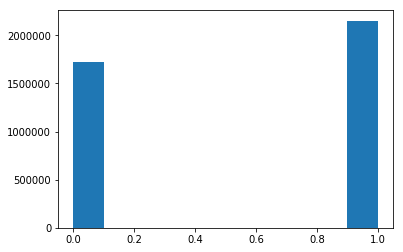

In [59]:
#Create target feature
data['y']=np.where((data['outcome'].isin(g_outcomes2)) | (data['umpcall']=='S'),1,0)
a=plt.hist(data['y'])

In [60]:
data.y.unique(), data.y.isnull().any()

(array([1, 0], dtype=int64), False)

In [61]:
data.columns

Index(['date', 'stadium', 'inning', 'side', 'pitcher', 'pitch_count', 'batter',
       'balls', 'strikes', 'ay', 'px', 'ax', 'sz_bot', 'vz0', 'vy0', 'pfx_x',
       'type_confidence', 'z0', 'tfs', 'pz', 'start_speed', 'az', 'zone',
       'break_angle', 'spin_dir', 'end_speed', 'vx0', 'sz_top', 'nasty',
       'descr', 'pfx_z', 'break_y', 'pitch_type', 'tfs_zulu', 'x', 'spin_rate',
       'y0', 'break_length', 'x0', 'umpcall', 'outcome', 'offense_score',
       'defense_score', 'rolling_start_speed', 'long_rolling_start_speed',
       'y'],
      dtype='object')

In [62]:
#Drop columns we´re not going to use
#data['year']=data['date'].str.slice(0,4)
data['year']=data['date'].dt.year
features=['date','umpcall', 'outcome','start_speed','pfx_x','pfx_z','px','pz','break_y','break_angle','break_length'
          ,'pitch_type','spin_dir','nasty','pitch_count','descr','y','year','zone','strikes','balls','pitcher','pitch_type',
         'rolling_start_speed', 'long_rolling_start_speed']
baseline_features=['start_speed','px','pz','year','y']

data=data[features]
data_base=data[baseline_features]

In [63]:
data.head()

,date,umpcall,outcome,start_speed,pfx_x,pfx_z,px,pz,break_y,break_angle,...,descr,y,year,zone,strikes,balls,pitcher,pitch_type,rolling_start_speed,long_rolling_start_speed
32,2013-06-11,S,NaN,92.5,-4.42,9.88,-0.895,2.039,23.8,24.8,...,Called Strike,1,2013,13,0,1,aardsda01,FF,92.26,91.65
33,2013-06-11,B,NaN,86.5,-6.92,3.89,-1.039,2.379,23.8,21.6,...,Ball,0,2013,13,1,1,aardsda01,FS,92.26,91.65
34,2013-06-11,S,NaN,92.8,-4.97,9.90,-0.314,3.032,23.8,28.2,...,Foul,1,2013,1,1,2,aardsda01,FF,92.46,91.72
35,2013-06-11,S,NaN,82.3,1.82,-3.22,-0.669,3.475,23.9,-5.0,...,Foul,1,2013,1,2,2,aardsda01,SL,92.46,91.72
36,2013-06-11,S,NaN,83.1,1.10,1.02,-0.064,1.347,23.7,-4.5,...,Swinging Strike,1,2013,13,2,2,aardsda01,SL,92.46,91.72


### Save data

In [64]:
#data_path = "MLB_" + year + "/MLB_PitchFX_" + year + "_RegularSeason.csv"
#year_data = pd.read_csv(filepath_or_buffer= folder_dir + data_path, header=0)
save_path=folder_dir+'data_clean.csv'
data.to_csv(save_path) 

In [65]:
data.dtypes

date                        datetime64[ns]
umpcall                             object
outcome                             object
start_speed                        float64
pfx_x                              float64
pfx_z                              float64
px                                 float64
pz                                 float64
break_y                            float64
break_angle                        float64
break_length                       float64
pitch_type                          object
spin_dir                           float64
nasty                              float64
pitch_count                          int64
descr                               object
y                                    int32
year                                 int64
zone                                 int64
strikes                              int64
balls                                int64
pitcher                             object
pitch_type                          object
rolling_sta

## 2. Divide in Train (2012-2016) and Test (2017)

In [74]:
#Train: 2012-15, Validation=2016, Test=2017
start = data["date"].searchsorted(datetime.datetime(2012, 1, 1))[0]
#start
end = data["date"].searchsorted(datetime.datetime(2017, 1, 1))[0] - 1
#end

X_train = data_base.loc[start:end]
y_train=X_train['y']
X_train=X_train.drop(['y','year'],axis=1)

X_test=data_base[end:]
y_test=X_test['y']
X_test=X_test.drop(['y','year'],axis=1)

In [68]:
X_train.shape

(2468392, 3)

## 3. Baseline with Logistic Regression

In [75]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train=poly.fit_transform(X_train)
X_test=poly.fit_transform(X_test)

In [70]:
X_train.shape, X_test.shape

((2468392, 6), (710723, 6))

In [71]:
baseline=LogisticRegression()
baseline.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [72]:
#print(list(zip(list(X_train.columns),list(baseline.coef_[0]))))
baseline.coef_

array([[-0.00206295,  0.19082895,  0.37449837, -0.00800635, -0.0017274 ,
         0.2372183 ]])

In [73]:
probs=baseline.predict_proba(X_test)[:,1]
preds=baseline.predict(X_test)
baseline_loss=sklearn.metrics.log_loss(y_test,probs)
baseline_acc=sklearn.metrics.accuracy_score(y_test,preds)
majority_class=np.amax(y_test.value_counts(normalize=True))

print('%s: %0.2f, %s: %0.2f, %s: %0.2f '
      %('Baseline accuracy',baseline_acc,'Baseline log loss', baseline_loss,'Majority class',majority_class))

Baseline accuracy: 0.63, Baseline log loss: 0.68, Majority class: 0.55 
